<a href="https://colab.research.google.com/github/hansjang/Py_Radar/blob/main/%EB%8D%B0%EC%8B%B8%EB%9D%BC%EB%A9%B4_%EA%B8%B0%EC%B6%9C%EB%AA%A8%EC%9D%981%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 제1회 기출동형 모의고사

In [1]:
!git clone https://github.com/ADPclass/ADP_book_ver01.git

Cloning into 'ADP_book_ver01'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 172 (delta 36), reused 55 (delta 19), pack-reused 81 (from 1)
Receiving objects: 100% (172/172), 17.54 MiB | 9.45 MiB/s, done.
Resolving deltas: 100% (49/49), done.


# **머신러닝**

## **(1) EDA**

In [24]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/ADP_book_ver01/최신 기출동형 모의고사/student_data.csv')
display(df.head())

,school,sex,paid,activities,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
0,GP,F,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,6,5,6
1,GP,F,no,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,5
2,GP,F,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,8,7,8
3,GP,F,yes,yes,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,15,14
4,GP,F,yes,no,4.0,3.0,2.0,1.0,2.0,5.0,4.0,9,6,10


In [25]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      394 non-null    float64
 5   freetime    393 non-null    float64
 6   goout       392 non-null    float64
 7   Dalc        391 non-null    float64
 8   Walc        393 non-null    float64
 9   health      391 non-null    float64
 10  absences    392 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


None

총 395개의 관측치와 14개의 변수가 있다. <br>
학생성적을 예측하는 문제이므로 독립변수(target)는 grade 이다. <br>
문자형인 'school', 'sex', 'paid', 'activities'는 수치형으로의 인코딩이 필요해 보인다.  

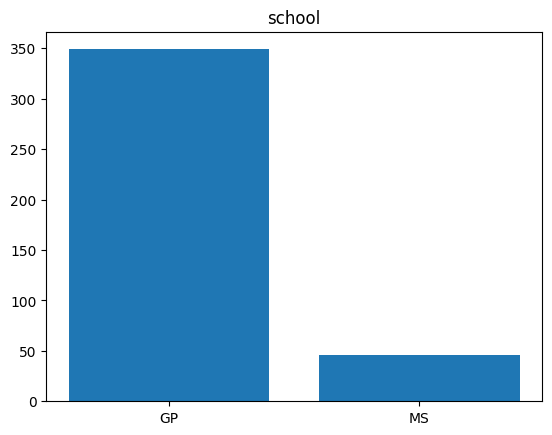

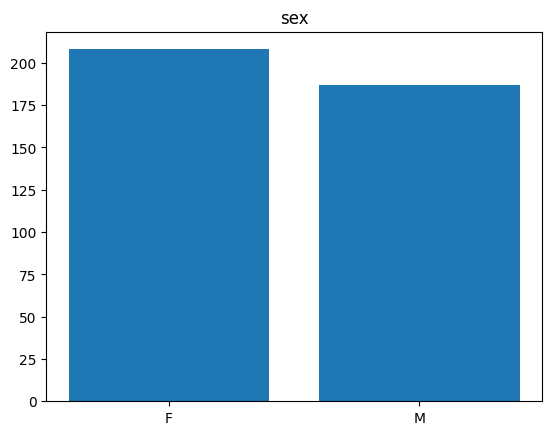

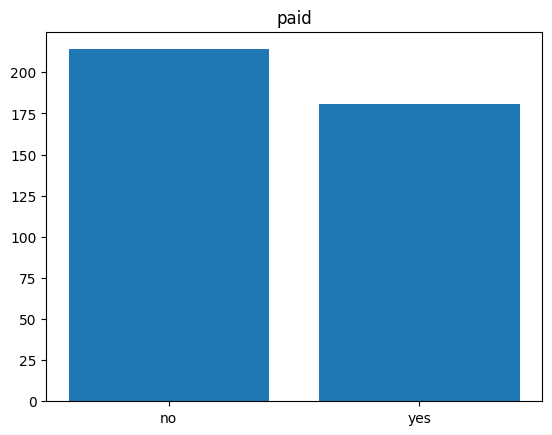

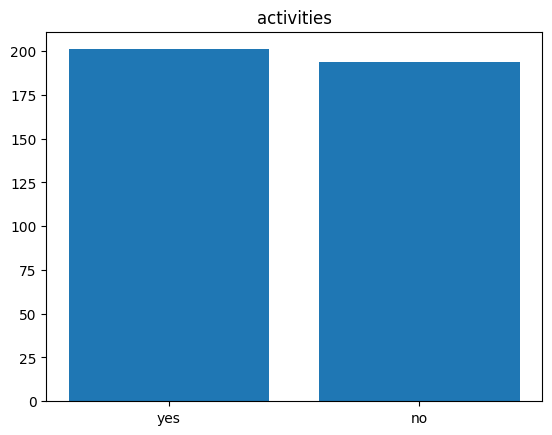

In [32]:
import matplotlib.pyplot as plt
# 범주형 변수 도수 분포표 그리기
## school
school_type = df['school'].value_counts()
plt.bar(school_type.index, school_type.values)
plt.title('school')
plt.show()
## sex
sex_type = df['sex'].value_counts()
plt.bar(sex_type.index, sex_type.values)
plt.title('sex')
plt.show()
## paid
paid_type = df['paid'].value_counts()
plt.bar(paid_type.index, paid_type.values)
plt.title('paid')
plt.show()
## activities
activities_type = df['activities'].value_counts()
plt.bar(activities_type.index, activities_type.values)
plt.title('activities')
plt.show()

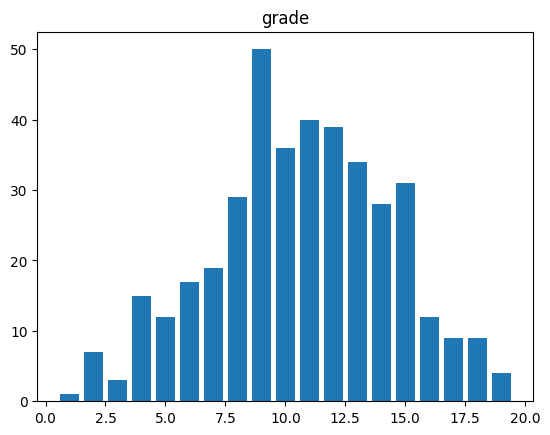

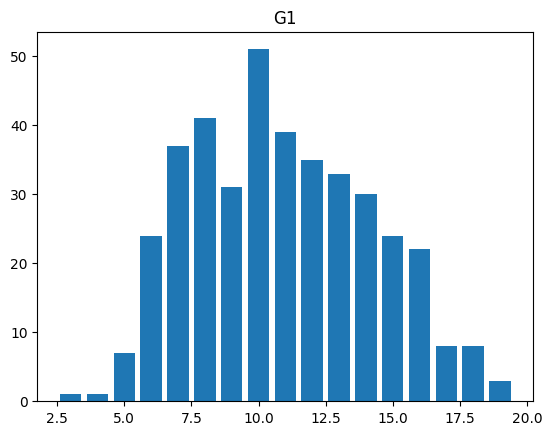

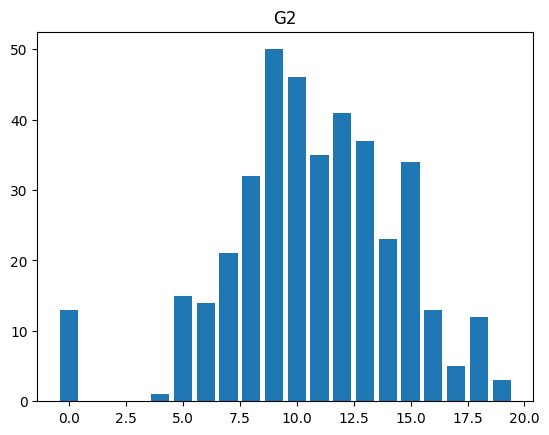

In [37]:
## grade
grade_type = df['grade'].value_counts()
plt.bar(grade_type.index, grade_type.values)
plt.title('grade')
plt.show()

## G1
G1_type = df['G1'].value_counts()
plt.bar(G1_type.index, G1_type.values)
plt.title('G1')
plt.show()

## G2
G2_type = df['G2'].value_counts()
plt.bar(G2_type.index, G2_type.values)
plt.title('G2')
plt.show()

종속변수(target) 후보군인 grade, G1, G2는 모두 연속형이다

In [26]:
display(df.describe())

,famrel,freetime,goout,Dalc,Walc,health,absences,grade,G1,G2
count,394.000000,393.000000,392.000000,391.000000,393.000000,391.000000,392.000000,395.000000,395.000000,395.000000
mean,3.944162,3.239186,3.114796,1.470588,2.284987,3.562660,5.676020,10.660759,10.908861,10.713924
std,0.897794,0.994265,1.112397,0.873266,1.287778,1.386949,8.013393,3.719390,3.319195,3.761505
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.000000
25%,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.000000,9.000000
50%,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,19.000000


 평균(mean)과 표준오차(std)를 살펴보았을 때, <br>
 수치형 변수들 가운데 'absences'를 제외한 다른 변수들은 <br>
 모두 분포가 유사하므로 스케일링 작업이 필요없어 보인다.

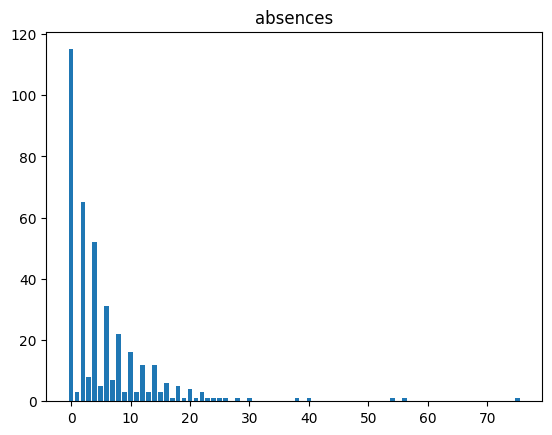

In [42]:
## absences
absences_type = df['absences'].value_counts()
plt.bar(absences_type.index, absences_type.values)
plt.title('absences')
plt.show()

수치형 변수들 가운데 'absences'의 분포는 결석을 한 번도 안한 '0'의 값이 <br>
데이터의 30% 정도를 차지하고 있으므로 결석여부를 기준으로 <br>
0, 1의 범주형 변수로 변환하는 것이 이상치도 조정할 수 있고, <br>
해석적으로도 합리적으로 보인다.

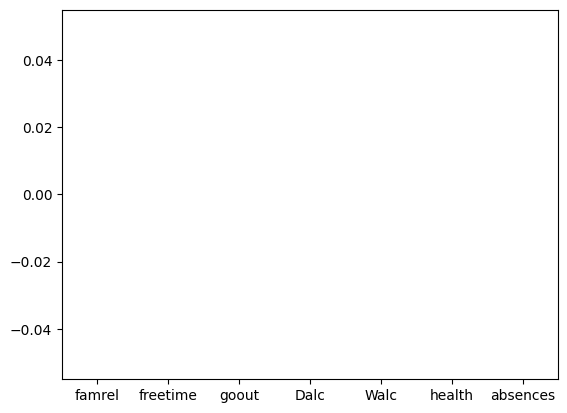

In [27]:
import matplotlib.pyplot as plt
# 수치형변수 박스 플롯(상자 그림)
# plt.boxplot(df[['famrel',	'freetime',	'goout',	'Dalc',	'Walc',
#                 'health',	'absences',	'grade',	'G1',	'G2']].values,
#             labels = ['famrel',	'freetime',	'goout',	'Dalc',	'Walc',
#                 'health',	'absences',	'grade',	'G1',	'G2'])
# plt.show()

plt.boxplot(df[['famrel',	'freetime',	'goout',	'Dalc',	'Walc',
                'health',	'absences']].values,
            labels = ['famrel',	'freetime',	'goout',	'Dalc',	'Walc',
                'health',	'absences'])
plt.show()

## **(2) 결측치 식별 및 예측 2가지 방법**



In [8]:
print(df.isna().sum())

school        0
sex           0
paid          0
activities    0
famrel        1
freetime      2
goout         3
Dalc          4
Walc          2
health        4
absences      3
grade         0
G1            0
G2            0
dtype: int64


결측치는 모두 수치형 변수들에서 발생했다. <br>
결측치를 모두 합해도 전체 관측값의 1% 정도만 차지하고 있다.

In [13]:
# 01. 결측치 삭제
df1 = df.dropna(how='any')
display(df1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      377 non-null    object 
 1   sex         377 non-null    object 
 2   paid        377 non-null    object 
 3   activities  377 non-null    object 
 4   famrel      377 non-null    float64
 5   freetime    377 non-null    float64
 6   goout       377 non-null    float64
 7   Dalc        377 non-null    float64
 8   Walc        377 non-null    float64
 9   health      377 non-null    float64
 10  absences    377 non-null    float64
 11  grade       377 non-null    int64  
 12  G1          377 non-null    int64  
 13  G2          377 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 44.2+ KB


None

결측치가 1개라도 있는 관측치가 있다면 해당 관측치를 삭제하는 방법이다. <br>
기존 395개 관측치에서 377개로 줄어들어 약 5% 가량의 데이터가 삭제되었다.

In [15]:
# 02. 결측치 치환
df2 = df.copy()
df2['famrel'].fillna(df2['famrel'].mean(), inplace=True)
df2['freetime'].fillna(df2['freetime'].mean(), inplace=True)
df2['goout'].fillna(df2['goout'].mean(), inplace=True)
df2['Dalc'].fillna(df2['Dalc'].mean(), inplace=True)
df2['Walc'].fillna(df2['Walc'].mean(), inplace=True)
df2['health'].fillna(df2['health'].mean(), inplace=True)
df2['absences'].fillna(df2['absences'].median(), inplace=True)
display(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   paid        395 non-null    object 
 3   activities  395 non-null    object 
 4   famrel      395 non-null    float64
 5   freetime    395 non-null    float64
 6   goout       395 non-null    float64
 7   Dalc        395 non-null    float64
 8   Walc        395 non-null    float64
 9   health      395 non-null    float64
 10  absences    395 non-null    float64
 11  grade       395 non-null    int64  
 12  G1          395 non-null    int64  
 13  G2          395 non-null    int64  
dtypes: float64(7), int64(3), object(4)
memory usage: 43.3+ KB


None

변수(컬럼)별 결측치를 평균값, 혹은 중앙값으로 치환하는 방법이다. <br>
absences의 경우, 이상치가 발견되므로(mean = 5.67, max = 75) 중앙값(median)으로 치환하였다. <br>
향후 작업에서는 결측치를 치환한 df2 데이터세트로 진행하겠다

## **(3) 범주형 변수 인코딩, 변환 적용**

In [33]:
display(df2['school'].value_counts())
display(df2['sex'].value_counts())
display(df2['paid'].value_counts())
display(df2['activities'].value_counts())

,count
school,
GP,349
MS,46


,count
sex,
F,208
M,187


,count
paid,
no,214
yes,181


,count
activities,
yes,201
no,194


범주형 변수들인 'school', 'sex', 'paid', 'activities'들은 각각 2개의 클래스로만 구성되어 있으므로 <br>
라벨인코딩으로 0, 1로 변환하는 것이<br>
더미변수화하여 변환하는 원핫인코딩보다 간단한 방법이다.

In [34]:
# 라벨인코딩(label encoding)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

## school
df2['school_enc'] = encoder.fit_transform(df2['school'].values.ravel())

## sex
df2['sex_enc'] = encoder.fit_transform(df2['sex'].values.ravel())

## paid
df2['paid_enc'] = encoder.fit_transform(df2['paid'].values.ravel())

## activities
df2['activities_enc'] = encoder.fit_transform(df2['activities'].values.ravel())

## 확인
display(df2[['school', 'school_enc', 'sex', 'sex_enc',
             'paid', 'paid_enc', 'activities', 'activities_enc']])

,school,school_enc,sex,sex_enc,paid,paid_enc,activities,activities_enc
0,GP,0,F,0,no,0,no,0
1,GP,0,F,0,no,0,no,0
2,GP,0,F,0,yes,1,no,0
3,GP,0,F,0,yes,1,yes,1
4,GP,0,F,0,yes,1,no,0
...,...,...,...,...,...,...,...,...
390,MS,1,M,1,yes,1,no,0
391,MS,1,M,1,no,0,no,0
392,MS,1,M,1,no,0,no,0
393,MS,1,M,1,no,0,no,0


In [43]:
# absences 수치형변수 => 범주형으로 변환
df2['absences'] = np.where(df['absences'] == 0, 0, 1)
display(df2['absences'].value_counts())

,count
absences,
1,280
0,115


## **(4) 데이터 분할 방법 2가지**

In [44]:
# 데이터 분할에 앞서, 변수들을 학습에 사용할 독립변수(X)와 종속변수(y)로 분리한다
X = df2[['famrel',	'freetime',	'goout',	'Dalc',	'Walc',	'health',	'absences',
         'school_enc',	'sex_enc',	'paid_enc',	'activities_enc']]
y = df2['grade']

In [45]:
# 학습용:평가용을 7:3 으로 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    random_state = 123)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(276, 11)

(119, 11)

(276,)

(119,)

## **(5) SVM, xgboost, randomforest**

종속변수(target)인 grade가 연속형이므로 <br>
회귀분석에 기반을 둔 알고리즘을 사용해야 한다. <br>
서포트벡터머신(SVM), XGboost, 랜덤포레스트(RF) 모두 <br>
분류(Classification) 뿐만아니라 회귀(Regression)도 <br>
지원하므로 학생성적 예측 분석에 적합한 알고리즘이다.

## **(6) 가장 적합한 알고리즘**

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# SVM
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, svr_pred)
print(f'SVM(SVR)의 MSE : {mse_svr}')

# XGBoost
import xgboost as xgb
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, xgb_pred)
print(f'XGB(Reg)의 MSE : {mse_xgb}')

# RandomForest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
rf_pred = reg.predict(X_test)
mse_rf = mean_squared_error(y_test, rf_pred)
print(f'RF(Reg)의 MSE : {mse_rf}')

SVM(SVR)의 MSE : 14.857220155620087
XGB(Reg)의 MSE : 18.184448135458336
RF(Reg)의 MSE : 14.589636362483086


세 가지 모델을 학습해 본 결과, MSE(평균제곱오차)값이 가장 낮은 XGBoost가 가장 적합한 알고리즘이라고 할 수 있다.

# **통계분석**

## **1.회귀분석 (1) 선형회귀**

In [65]:
# 모듈 불러오기
import numpy as np
import pandas as pd
# !pip install mglearn
import mglearn
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


# 데이터 불러오기
X, y = mglearn.datasets.load_extended_boston()
# print(X.shape)
# print(y.shape)

# 데이터 8:2로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,
                                                    random_state = 123)
# display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 선형회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_rmse = round(np.sqrt(mean_squared_error(y_test, lr_pred)), 4)
lr_r2 = round(r2_score(y_test, lr_pred), 4)
# lr_r2 = lr.score(X_test, y_test)
print(f'결정계수 = {lr_r2}')
print(f'rmse = {lr_rmse}')

결정계수 = 0.8249
rmse = 3.8066


## **1.회귀분석 (2) 릿지회귀**

In [69]:
# 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# 알파값 설정
alpha = np.linspace(0, 1, num = 11)

# 릿지 적용
r2_scores = []
rmse_scores = []

for i, a in enumerate(alpha):
  ridge = Ridge(alpha=a, random_state = 123)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_test)

  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))

  r2_scores.append(r2)
  rmse_scores.append(rmse)

# 결과 출력
for a, r2, rmse in zip(alpha, r2_scores, rmse_scores):
  print(f'Alpha: {a: .2f}, R2 : {r2: .4f}, RMSE : {rmse: .4f}')

Alpha:  0.00, R2 :  0.8249, RMSE :  3.8066
Alpha:  0.10, R2 :  0.7821, RMSE :  4.2459
Alpha:  0.20, R2 :  0.7831, RMSE :  4.2365
Alpha:  0.30, R2 :  0.7823, RMSE :  4.2436
Alpha:  0.40, R2 :  0.7809, RMSE :  4.2578
Alpha:  0.50, R2 :  0.7791, RMSE :  4.2749
Alpha:  0.60, R2 :  0.7772, RMSE :  4.2935
Alpha:  0.70, R2 :  0.7752, RMSE :  4.3126
Alpha:  0.80, R2 :  0.7732, RMSE :  4.3318
Alpha:  0.90, R2 :  0.7712, RMSE :  4.3507
Alpha:  1.00, R2 :  0.7693, RMSE :  4.3694


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.13494e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Alpha 값이 0일 때 결정계수는 0.8249로 가장 높고, <BR>
RMSE는 3.8066으로 가장 낮다

## **1.회귀분석 (3) 라쏘회귀**

In [70]:
# 모듈 불러오기
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


# 알파값 설정
alpha = np.linspace(0, 1, num = 11)

# 라쏘 적용
r2_scores = []
rmse_scores = []

for i, a in enumerate(alpha):
  lasso = Lasso(alpha=a, random_state = 123)
  lasso.fit(X_train, y_train)
  y_pred = lasso.predict(X_test)

  r2 = r2_score(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))

  r2_scores.append(r2)
  rmse_scores.append(rmse)

# 결과 출력
for a, r2, rmse in zip(alpha, r2_scores, rmse_scores):
  print(f'Alpha: {a: .2f}, R2 : {r2: .4f}, RMSE : {rmse: .4f}')

Alpha:  0.00, R2 :  0.8056, RMSE :  4.0110
Alpha:  0.10, R2 :  0.5937, RMSE :  5.7982
Alpha:  0.20, R2 :  0.5849, RMSE :  5.8606
Alpha:  0.30, R2 :  0.5756, RMSE :  5.9256
Alpha:  0.40, R2 :  0.5556, RMSE :  6.0639
Alpha:  0.50, R2 :  0.5238, RMSE :  6.2768
Alpha:  0.60, R2 :  0.4803, RMSE :  6.5572
Alpha:  0.70, R2 :  0.4264, RMSE :  6.8888
Alpha:  0.80, R2 :  0.3650, RMSE :  7.2483
Alpha:  0.90, R2 :  0.2973, RMSE :  7.6249
Alpha:  1.00, R2 :  0.2290, RMSE :  7.9866


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.244e+03, tolerance: 3.423e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

Alpha 값이 0일 때 결정계수는 0.8056로 가장 높고, <BR>
RMSE는 4.0110으로 가장 낮다

## **2.다항회귀분석 시각화**

1) 데이터 생성 및 준비

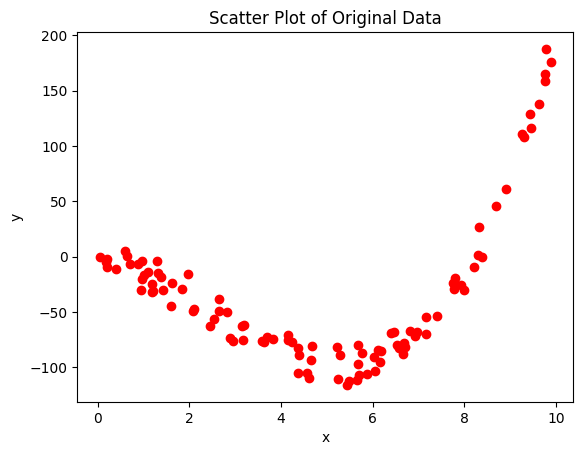

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 샘플 데이터 생성 (x는 1차원 배열, y는 종속 변수)
np.random.seed(0)
x = np.random.rand(100, 1) * 10  # 0~10 사이의 값을 갖는 데이터 생성
y = x**3 - 7 * x**2 - 10 * x + np.random.randn(100, 1) * 10  # 3차 방정식에 노이즈 추가

# 스캐터 플롯 (원본 데이터)
plt.scatter(x, y, color='red')
plt.title("Scatter Plot of Original Data")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

2) 3차 다항 회귀 변환 및 모델 학습

In [87]:
# 1차, 3차 다항식 변환
poly1 = PolynomialFeatures(degree=1)
poly3 = PolynomialFeatures(degree=3)

X_poly1 = poly1.fit_transform(x)
X_poly3 = poly3.fit_transform(x)

# 선형 회귀 모델 학습
model1 = LinearRegression().fit(X_poly1, y)
model3 = LinearRegression().fit(X_poly3, y)

# 예측값 계산
x_line = np.linspace(0, 10, 100).reshape(-1, 1)  # 0~10 사이의 선형 공간

# 각 모델에 대한 예측값 계산
y_pred1 = model1.predict(poly1.transform(x_line))
y_pred3 = model3.predict(poly3.transform(x_line))

3) 스캐터 플롯과 회귀 곡선 그리기

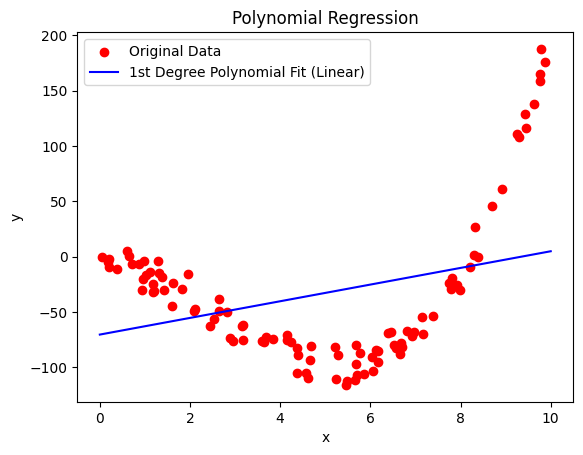

In [88]:
# 스캐터 플롯 (원본 데이터)
plt.scatter(x, y, color='red', label="Original Data")

# 회귀 직선 (1차, 3차 모델)
plt.plot(x_line, y_pred1, color='blue', label="1st Degree Polynomial Fit (Linear)")
# plt.plot(x_line, y_pred3, color='red', label="3rd Degree Polynomial Fit")

# 그래프 설정
plt.title("Polynomial Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


## **2.ANOVA분석**

1) 예시데이터 생성

In [89]:
import pandas as pd
import numpy as np

# 예시 데이터 생성
np.random.seed(0)
n = 100  # 샘플 수

# 범주형 변수 (A/B/C 세 가지 그룹)
group = np.random.choice(['A', 'B', 'C'], size=n)

# 수치형 연속 변수 1
value1 = np.random.randn(n) + np.where(group == 'A', 2, 0)  # A 그룹은 평균 2
value2 = np.random.randn(n) + np.where(group == 'B', 1, 0)  # B 그룹은 평균 1

# 데이터프레임 생성
data = pd.DataFrame({
    'Group': group,
    'Value1': value1,
    'Value2': value2
})

print(data.head())

  Group    Value1    Value2
0     A  1.313411 -0.147806
1     B  0.014873  2.683827
2     A  1.624334  0.971832
3     B -0.038224  2.607674
4     B  0.367974  0.742872


2) 이원분산분석 수행

In [90]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 이원분산분석 모델 적합
model = ols('Value1 ~ C(Group) + Value2', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

             sum_sq    df          F        PR(>F)
C(Group)  69.217626   2.0  34.273722  5.848500e-12
Value2     1.982263   1.0   1.963071  1.644097e-01
Residual  96.938583  96.0        NaN           NaN
